In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

First import soil moisture data from the master data sheet. We have 12 weeks of soil moisture data for 36 plots and 12 treatments.

In [47]:
soil_moisture = pd.read_excel('2021 Data.xlsx', sheet_name = 'Soil Moisture' )
soil_moisture.head()

,Plot Number,Treatment,Block,Sample Date,Moisture Content,Simp. Treatment,Treatment Description,Short Trt Description
0,1,2S,2,1,0.050720,2.0,"Corn/Soy, Spring Manure","CS, SM"
1,2,6S,2,1,0.053265,6.0,"Corn/Soy, Fall Manure","CS, FM"
2,3,1C,2,1,0.075589,1.0,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,3.1,2,1,0.059354,3.1,Continuous Corn,CC
4,5,4.1,2,1,0.082545,4.1,Continuous Corn + PGC,CC + PGC


Make the column names shorter

In [50]:
soil_moisture = soil_moisture.rename(columns={'Plot Number': 'Plot'})
soil_moisture = soil_moisture.rename(columns={'Sample Date': 'Date'})
soil_moisture = soil_moisture.rename(columns={'Simp. Treatment': 'simp_trt'})
soil_moisture = soil_moisture.rename(columns={'Moisture Content': 'MC'})
soil_moisture.head()

,Plot,Treatment,Block,Date,MC,simp_trt,Treatment Description,Short Trt Description
0,1,2S,2,1,0.050720,2.0,"Corn/Soy, Spring Manure","CS, SM"
1,2,6S,2,1,0.053265,6.0,"Corn/Soy, Fall Manure","CS, FM"
2,3,1C,2,1,0.075589,1.0,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,3.1,2,1,0.059354,3.1,Continuous Corn,CC
4,5,4.1,2,1,0.082545,4.1,Continuous Corn + PGC,CC + PGC


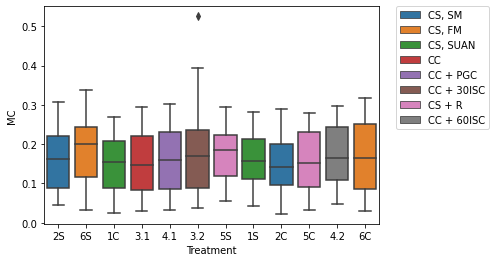

In [97]:
ax = sns.boxplot(x = "Treatment", y = "MC", data = soil_moisture, hue = 'Short Trt Description', dodge = False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('trt_mc_box.jpg', bbox_inches='tight')

The treatments don't look all that different. There is an outlier on the 30 in row treatment. 

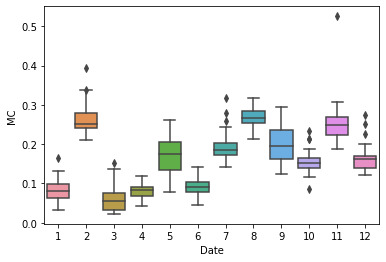

In [96]:
ax = sns.boxplot(x = "Date", y = "MC", data = soil_moisture)
plt.savefig('date_bc_box.jpg', bbox_inches='tight')

Function to filter the data by date

In [54]:
def filterbydate (sampledate):
    sample_date_df = pd.DataFrame(soil_moisture[soil_moisture.Date == sampledate])
    return sample_date_df

In [55]:
filterbydate(2).head()

,Plot,Treatment,Block,Date,MC,simp_trt,Treatment Description,Short Trt Description
36,1,2S,2,2,0.222821,2.0,"Corn/Soy, Spring Manure","CS, SM"
37,2,6S,2,2,0.251901,6.0,"Corn/Soy, Fall Manure","CS, FM"
38,3,1C,2,2,0.229083,1.0,"Corn/Soy, Spring UAN","CS, SUAN"
39,4,3.1,2,2,0.263580,3.1,Continuous Corn,CC
40,5,4.1,2,2,0.256769,4.1,Continuous Corn + PGC,CC + PGC


Use that function to create box plots by date. 

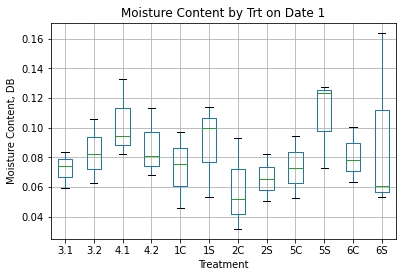

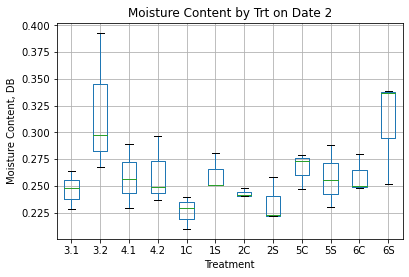

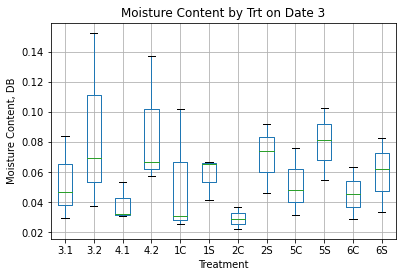

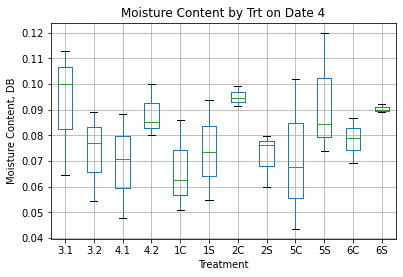

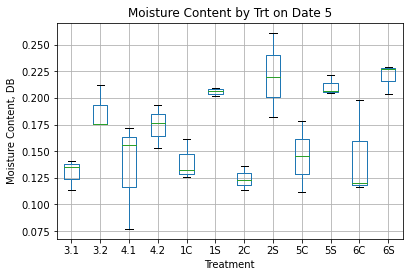

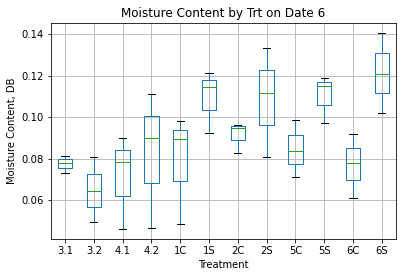

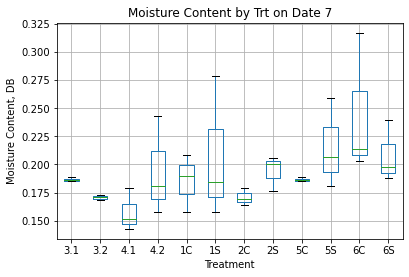

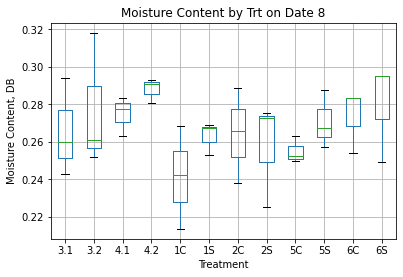

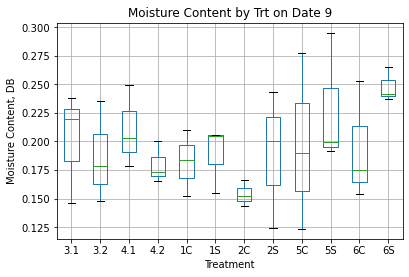

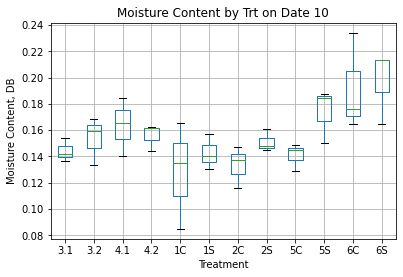

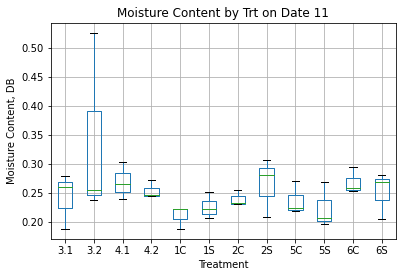

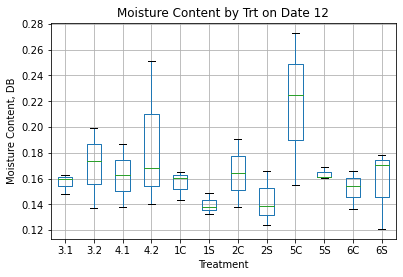

In [56]:
sample_date = 1 
while sample_date <= max(soil_moisture.Date):
    date_df = filterbydate(sample_date)
    date_df.boxplot('MC', by = 'Treatment')
    plt.title('Moisture Content by Trt on Date {}'.format(sample_date))
    plt.suptitle("")
    plt.ylabel("Moisture Content, DB")
    sample_date = sample_date + 1

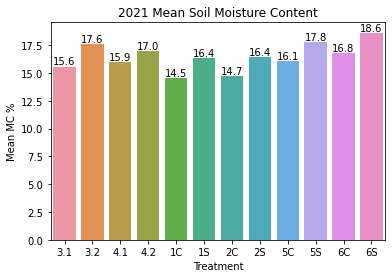

In [57]:
trt_means = pd.DataFrame(soil_moisture.groupby('Treatment')['MC'].describe()['mean'])
trt_means = trt_means.reset_index()
trt_means['mean'] = 100 * trt_means['mean']

ax = sns.barplot(x = 'Treatment', y = 'mean', data = trt_means)
ax.set_title('2021 Mean Soil Moisture Content')
ax.set(xlabel='Treatment', ylabel='Mean MC %')

#for annotating 
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('MC_bar_trt.jpg', bbox_inches='tight')

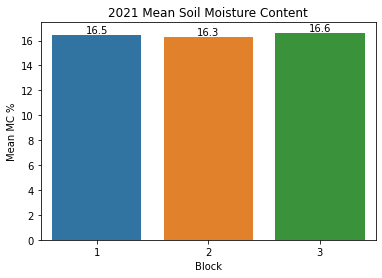

In [58]:
block_means = pd.DataFrame(soil_moisture.groupby('Block')['MC'].describe()['mean'])
block_means = block_means.reset_index()
block_means['mean'] = 100 * block_means['mean']

ax = sns.barplot(x = 'Block', y = 'mean', data = block_means)
ax.set_title('2021 Mean Soil Moisture Content')
ax.set(xlabel='Block', ylabel='Mean MC %')

#for annotating 
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('MC_bar_block.jpg', bbox_inches='tight')

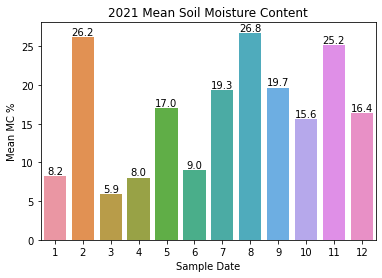

In [59]:
day_means = pd.DataFrame(soil_moisture.groupby('Date')['MC'].describe()['mean'])
day_means = day_means.reset_index()
day_means['mean'] = 100 * day_means['mean']

ax = sns.barplot(x = 'Date', y = 'mean', data = day_means)
ax.set_title('2021 Mean Soil Moisture Content')
ax.set(xlabel='Sample Date', ylabel='Mean MC %')

#for annotating 
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
        
plt.savefig('MC_bar_date.jpg', bbox_inches='tight')

## Checking for Normality

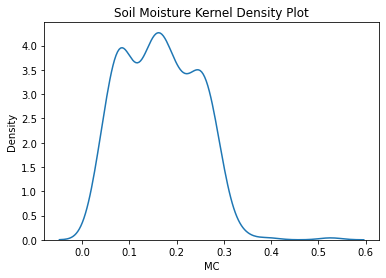

In [60]:
sns.kdeplot(data=soil_moisture, x="MC")
plt.title('Soil Moisture Kernel Density Plot')
plt.savefig('soil_moisture_kde.jpg', bbox_inches='tight')

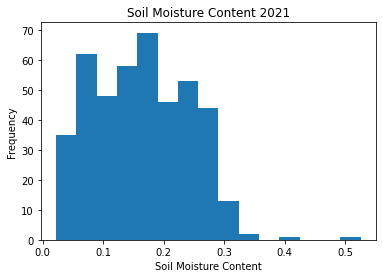

In [62]:
plt.hist(x='MC', bins = 'auto', data = soil_moisture)
plt.title("Soil Moisture Content 2021")
plt.xlabel('Soil Moisture Content')
plt.ylabel('Frequency')
plt.savefig('Soil_MC_Histogram.jpg', bbox_inches='tight')

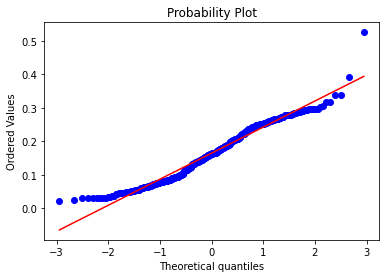

<Figure size 432x288 with 0 Axes>

In [63]:
import scipy.stats as stats
stats.probplot(soil_moisture['MC'], dist="norm", plot=plt)
plt.show()
plt.savefig('soil_moisture_probplot', bbox_inches='tight')

In [82]:
pg.normality(soil_moisture, group='Treatment', dv='MC')

,W,pval,normal
2S,0.952880,0.128851,True
6S,0.965920,0.324772,True
1C,0.961268,0.235156,True
3.1,0.955072,0.150982,True
4.1,0.948630,0.094685,True
3.2,0.907526,0.005516,False
5S,0.959953,0.214258,True
1S,0.948358,0.092842,True
2C,0.960136,0.217054,True
5C,0.930807,0.026481,False


In [84]:
pg.normality(soil_moisture, group='Date', dv='MC')

,W,pval,normal
1,0.960749,2.266894e-01,True
2,0.858340,2.978925e-04,False
3,0.891883,2.062198e-03,False
4,0.983862,8.662307e-01,True
5,0.969947,4.240769e-01,True
6,0.976246,6.180680e-01,True
7,0.850150,1.918544e-04,False
8,0.985895,9.177669e-01,True
9,0.971317,4.625928e-01,True
10,0.941432,5.629814e-02,True


In [85]:
pg.normality(soil_moisture, group='Block', dv='MC')

,W,pval,normal
2,0.945980,0.000023,False
3,0.974413,0.008447,False
1,0.956845,0.000177,False


## Bartlett’s Test of Homogeneity of Variances

In [64]:
soil_moisture['Treatment'].unique()

array(['2S', '6S', '1C', 3.1, 4.1, 3.2, '5S', '1S', '2C', '5C', 4.2, '6C'],
      dtype=object)

In [68]:
pip install pingouin

  Using cached pingouin-0.5.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl


In [69]:
import pingouin as pg

# Bartlett's test in Python with pingouin:
pg.homoscedasticity(soil_moisture, dv='MC', 
                    group='Treatment',
                   method='bartlett')

,T,pval,equal_var
bartlett,10.737118,0.465542,True


The treatments have equal variances. 

In [76]:

pg.homoscedasticity(soil_moisture, dv='MC', 
                    group='Date',
                   method='bartlett')

,T,pval,equal_var
bartlett,77.757506,3.998443e-12,False


The dates do not have equali variances. 

In [77]:
pg.homoscedasticity(soil_moisture, dv='MC', 
                    group='Block',
                   method='bartlett')

,T,pval,equal_var
bartlett,2.178006,0.336552,True


Blocks have equal variances.

## ANOVA

In [94]:
model = ols('MC ~ C(Block) + C(simp_trt) + C(Date) + C(Block):C(Date) + C(Block):C(simp_trt) + C(Date):C(simp_trt) + C(Date):C(simp_trt):C(Block)', data = soil_moisture).fit()

aov_table = sm.stats.anova_lm(model)

print(aov_table)

                                 df    sum_sq   mean_sq           F  \
C(Block)                        2.0  0.000971  0.000486    0.403765   
C(simp_trt)                     7.0  0.034961  0.004994    4.153477   
C(Date)                        11.0  2.166061  0.196915  163.758221   
C(Block):C(Date)               22.0  0.027173  0.001235    1.027175   
C(Block):C(simp_trt)           14.0  0.013106  0.000936    0.778506   
C(Date):C(simp_trt)            77.0  0.098117  0.001274    1.059694   
C(Date):C(simp_trt):C(Block)  154.0  0.160669  0.001043    0.867634   
Residual                      144.0  0.173156  0.001202         NaN   

                                    PR(>F)  
C(Block)                      6.685547e-01  
C(simp_trt)                   3.426457e-04  
C(Date)                       1.440032e-75  
C(Block):C(Date)              4.355479e-01  
C(Block):C(simp_trt)          6.909369e-01  
C(Date):C(simp_trt)           3.779958e-01  
C(Date):C(simp_trt):C(Block)  8.069726e-01  


Date and treatment had significant effects. 

In [89]:
soil_moisture.anova(dv="MC", between=["simp_trt", "Block", "Date"], ss_type = 3).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,simp_trt,0.035,7.0,0.005,4.153,0.000,0.168
1,Block,0.001,2.0,0.001,0.529,0.590,0.007
2,Date,1.982,11.0,0.180,149.858,0.000,0.920
3,simp_trt * Block,0.013,14.0,0.001,0.779,0.691,0.070
4,simp_trt * Date,0.098,77.0,0.001,1.060,0.378,0.362
5,Block * Date,0.032,22.0,0.001,1.206,0.252,0.156
6,simp_trt * Block * Date,0.161,154.0,0.001,0.868,0.807,0.481
7,Residual,0.173,144.0,0.001,NaN,NaN,NaN


In [93]:
pg.pairwise_gameshowell(data = soil_moisture, dv = 'MC', between = 'Treatment').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,3.1,3.2,0.156,0.176,-0.020,0.021,-0.963,63.487,0.9,-0.224
1,3.1,4.1,0.156,0.159,-0.004,0.018,-0.200,69.340,0.9,-0.047
2,3.1,4.2,0.156,0.170,-0.014,0.018,-0.804,69.988,0.9,-0.188
3,3.1,1C,0.156,0.145,0.011,0.017,0.635,69.449,0.9,0.148
4,3.1,1S,0.156,0.164,-0.008,0.017,-0.459,69.970,0.9,-0.107
...,...,...,...,...,...,...,...,...,...,...
61,5C,6C,0.161,0.168,-0.007,0.019,-0.358,69.719,0.9,-0.084
62,5C,6S,0.161,0.186,-0.026,0.019,-1.331,69.867,0.9,-0.310
63,5S,6C,0.178,0.168,0.010,0.018,0.571,67.158,0.9,0.133
64,5S,6S,0.178,0.186,-0.008,0.018,-0.456,67.644,0.9,-0.106
